# Logistic Regression

### organize the df (titanic dataset)

In [81]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('titanic.csv') #   Open the df.
df.head() # Print 5 reviews.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.describe() # The df.describe() method in pandas generates a summary of statistics for the numerical columns in the dataframe df.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.info() # Show the type of the variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df.select_dtypes(include='object').nunique() # Show how much variables is type 'object' in the df.

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

### Data cleaning

In [34]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True) # Remove the unnecessary columns. (text data, not important for our project)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [35]:
df.info() # We can see that we are missing age data, we will have to fill it in by putting the average ages in the blanks.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [36]:
df['Age'].fillna(df['Age'].mean(), inplace=True) # We filled in the blanks with the average ages.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


C:\Users\Home\AppData\Local\Temp\ipykernel_17452\2488573881.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True) # We filled in the blanks with the average ages.


### Feature Engineering

In [37]:
df['Sex'].unique() # The df['Sex'].unique() method returns a numpy array of the unique values in the 'Sex' column of the dataframe df.

array(['male', 'female'], dtype=object)

In [38]:
df['Sex'] = df['Sex'].replace({'male' : 0, 'female' : 1 }) #In the sex column, change "male" to 0 and "female" to 1.
df

C:\Users\Home\AppData\Local\Temp\ipykernel_17452\905803878.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male' : 0, 'female' : 1 }) #In the sex column, change "male" to 0 and "female" to 1.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.699118,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [39]:
df['Embarked'].unique() # The df['Embarked'].unique() method returns a numpy array of the unique values in the 'Embarked' column of the dataframe df.

array(['S', 'C', 'Q', nan], dtype=object)

In [40]:
embarked_dummies = pd.get_dummies(df['Embarked'], drop_first=False) # Create a table of dummies, which says what is the port of departure.
embarked_dummies = embarked_dummies.astype(int) # We will convert the table instead of Boolean variables to 0 or 1.
embarked_dummies

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [41]:
df = pd.concat([df, embarked_dummies], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,0,22.000000,1,0,7.2500,S,0,0,1
1,1,1,1,38.000000,1,0,71.2833,C,1,0,0
2,1,3,1,26.000000,0,0,7.9250,S,0,0,1
3,1,1,1,35.000000,1,0,53.1000,S,0,0,1
4,0,3,0,35.000000,0,0,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S,0,0,1
887,1,1,1,19.000000,0,0,30.0000,S,0,0,1
888,0,3,1,29.699118,1,2,23.4500,S,0,0,1
889,1,1,0,26.000000,0,0,30.0000,C,1,0,0


In [42]:
df = df.drop(['Embarked'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,1,29.699118,1,2,23.4500,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,0,0


### Prepare the training and test data

In [43]:
x1 = df.drop(['Survived'], axis=1).to_numpy() # x1 will include all our data except for a 'Survived' column which is our target vector.
y1 = df['Survived'].to_numpy() # y1 will include just the 'Survived' column which is our target vector.
print('before dividing: ',x1.shape, y1.shape) # Prints all records before. (891, 9) (891,) = 891 records with 9 properties.
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3, random_state=41) # Dividing the data.
print('train: ',x_train.shape, y_train.shape) # 623 records with 9 properties.
print('test: ',x_test.shape, y_test.shape) # 268 records with 9 properties.

before dividing:  (891, 9) (891,)
train:  (623, 9) (623,)
test:  (268, 9) (268,)


##### Normalizing the data, so that they are all on a scale between 0 and 1. 

In [50]:
scaler = MinMaxScaler()
print('max: ', x_train.max())
print('max: ', x_train.min())

x_train = scaler.fit_transform(x_train) # Fit the object.
x_test = scaler.transform(x_test) # Transform the data.

print('max: ', x_train.max())
print('max: ', x_train.min())

max:  512.3292
max:  0.0
max:  1.0
max:  0.0


### Logistic Regression using sklearn

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000) # Building an object of the model and changing properties, the number of iterations is changed to 1000 instead of 100.
clf.fit(x_train, y_train) # Place the object on the data.

LogisticRegression(max_iter=1000, random_state=0)

In [52]:
pred1 = clf.predict(x_train) # Making a prediction on the data.
print(classification_report(y_train, pred1, digits=4)) # Performance review vs y_train.

              precision    recall  f1-score   support

           0     0.8195    0.8682    0.8432       387
           1     0.7606    0.6864    0.7216       236

    accuracy                         0.7994       623
   macro avg     0.7900    0.7773    0.7824       623
weighted avg     0.7972    0.7994    0.7971       623


In [53]:
pred2 = clf.predict(x_test) # Making a prediction on the data.
print(classification_report(y_test, pred2, digits=4)) # Performance review vs y_test.

              precision    recall  f1-score   support

           0     0.8122    0.9074    0.8571       162
           1     0.8276    0.6792    0.7461       106

    accuracy                         0.8172       268
   macro avg     0.8199    0.7933    0.8016       268
weighted avg     0.8183    0.8172    0.8132       268


### Logistic Regression using python code

In [55]:
def sigmoid(z): # The sigmoid provides an answer to classification problems, As in our problem if the passenger survived or not.
        s = 1 / (1 + np.exp(-z)) 
        return s

In [56]:
class Logistic_Regression:
    
    
    # X: order matrix (n * m)
    # Y, A: Two-dimensional vector (1 * m)
    # dw: Two-dimensional vector (n * 1)
    # db: float
    def propagate(self, X, Y):
        m = X.shape[1] # Calculate the properties.
        A = sigmoid(np.dot(self.w.T, X) + self.b) # The sigmoid calculation, its result will determine whether the person survived or not.
        cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) # The cost equation is a sum of our loss equation, when its result is smaller, the success of the model prediction is greater.
        dw = (1 / m) * np.dot(X, (A - Y).T) # dw is for gradient descent.
        db = (1 / m) * np.sum(A - Y) # db is for gradient descent.
        return dw, db, cost
    
    
    
    
    # x1: order matrix (m * n)
    # y1: A one-dimensional vector (m)
    # X: order matrix (n * m)
    # Y: Two-dimensional vector (1 * m)
    # w, dw: Two-dimensional vector (n * 1)
    # b, db: float
    def fit(self, x1, y1, num_iterations=1000, learning_rate=0.5):
        X = x1.T # Change the order of the matrix from (m * n) to (n * m)
        Y = y1.reshape(1, -1) # Change the dimension of the vector from (m) to (1 * m), One-dimension to Two-dimension
        self.w = np.zeros((X.shape[0], 1)) # 'w' is an order vector (n * 1), that 'n' is the number of features.
        self.b = 0 # 'b' is a variable of a kind 'flout'.
        costs = [] # A list that will store the results of the cost equation.
        for i in range(num_iterations + 1):
            dw, db, cost = self.propagate(X, Y) # We send the 'X' and 'Y' to the 'propagate' function, aAnd the function will return values that will be stored in these variables.
            self.w -= learning_rate * dw # For the purpose of gradient decent, from a variable 'w' we subtract the learning_rate and dw. 
            self.b -= learning_rate * db # For the purpose of gradient decent, from a variable 'b' we subtract the learning_rate and db. 
            if i % 100 == 0: # Every hundred iterations.
                costs.append(cost) # We will add the cost result to the list of costs.
                print('cost after itertion %i: %f' %(i, cost)) # We print the iteration number together with the cost result.  
        return costs # The 'fit' function return the list of costs.
    
    
    
    # x1: order matrix (m * n)
    # X: order matrix (n * m)
    # Y, A: Two-dimensional vector (1 * m)
    # w: Two-dimensional vector (n * 1)
    def predict(self, x1): # Prediction function.
        X = x1.T # Change the order of the matrix from (m * n) to (n * m)
        # np.dot(1 * n, n * m) = (1 * m) 
        A = sigmoid(np.dot(self.w.T, X) + self.b) # The sigmoid calculation, its result will determine whether the person survived or not.
        # np.where(1 * m)
        Y_pred = np.where(A >= 0.5, 1, 0) # The function 'np.where' goes over the matrix A, and under the condition that if the value in the place is greater than 0.5 then we will classify as 1 and if the value in the place is less than 0.5 then we will classify as 0. 'Y_pred' is a matrix of the same order (1 * m), with values (0,1). 
        return Y_pred.reshape(-1) # The function 'Y_pred.reshape(-1)' changes the two-dimensional vector(matrix) For a one-dimensional vector.


In [57]:
clf2 = Logistic_Regression() # object of Logistic_Regression.

In [58]:
costs = clf2.fit(x_train,y_train) # Training the model with 'x_train ' and 'y_train' data.

cost after itertion 0: 0.693147
cost after itertion 100: 0.471994
cost after itertion 200: 0.464976
cost after itertion 300: 0.461682
cost after itertion 400: 0.459092
cost after itertion 500: 0.456963
cost after itertion 600: 0.455210
cost after itertion 700: 0.453763
cost after itertion 800: 0.452567
cost after itertion 900: 0.451576
cost after itertion 1000: 0.450752


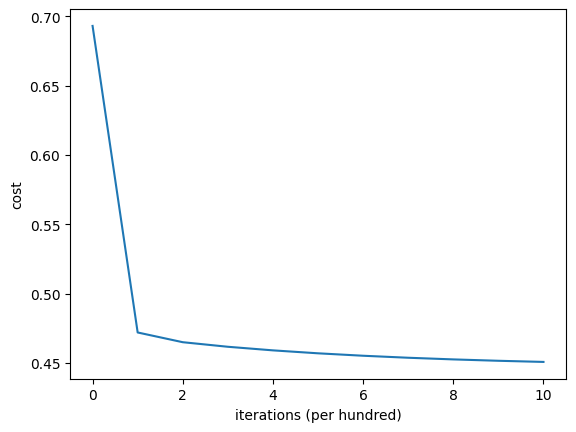

In [59]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundred)')
plt.show()
# Now we can see in the graph the learning rate of the model, according to 100 iterations each time.
#You can see that at the beginning the numbers are high, which means the model fails to predict the results well, but after a few hundred iterations we see low numbers in the results, which show that the model is successful in predicting the results in the best way.

In [69]:
pred3 = clf2.predict(x_train) # Making a prediction on the data.
print(classification_report(y_train, pred3, digits=4)) # Performance review vs y_train.

              precision    recall  f1-score   support

           0     0.8200    0.8708    0.8446       387
           1     0.7642    0.6864    0.7232       236

    accuracy                         0.8010       623
   macro avg     0.7921    0.7786    0.7839       623
weighted avg     0.7988    0.8010    0.7986       623


array([[337,  50],
       [ 74, 162]], dtype=int64)

In [62]:
pred3 = clf2.predict(x_test) # Making a prediction on the data.
print(classification_report(y_test, pred3, digits=4)) # Performance review vs y_test.

              precision    recall  f1-score   support

           0     0.8167    0.9074    0.8596       162
           1     0.8295    0.6887    0.7526       106

    accuracy                         0.8209       268
   macro avg     0.8231    0.7980    0.8061       268
weighted avg     0.8218    0.8209    0.8173       268


### Confussion matrix between clf to clf2 on data set 

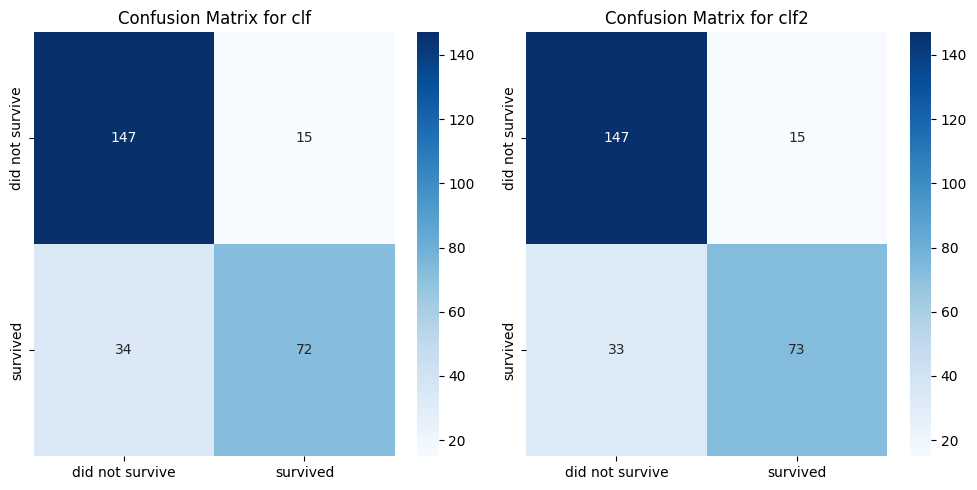

In [84]:
pred_clf = clf.predict(x_test) # Making a prediction on the data set.
cm = confusion_matrix(y_test, pred_clf) # Making a confusion_matrix on the data set.

pred_clf2 = clf2.predict(x_test) # Making a prediction on the data set.
cm2 = confusion_matrix(y_test, pred_clf2) # Making a confusion_matrix on the data set.

classes = ["did not survive", "survived"]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix for clf")

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix for clf2")

plt.tight_layout()
plt.show()